<a href="https://colab.research.google.com/github/Honghai2102/AIO-EXERCISE/blob/feature%2FM04EX01/Advertising_Stochastic_Problem_Question_1_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Question 1

In [1]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):

    result = [row[index] for row in data]

    return result

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
  N = len(data)

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # building X input  and y output for training
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data
  return X,y

In [3]:
#Multiple choices:
#Question 1:
X,y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


###Question 2

In [4]:
# compute output and loss
def predict(x1, x2, x3, w1, w2, w3, b):

  result = w1 * x1 + w2 * x2 + w3 * x3 + b

  return result

def compute_loss_mse(y_hat, y):

  result = (y_hat - y) ** 2

  return result

def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

# compute gradient
def compute_gradient_wi(xi, y, y_hat):

  dl_dwi = 2 * (y_hat - y) * xi

  return dl_dwi

def compute_gradient_b(y, y_hat):

  dl_db = 2 * (y_hat - y)

  return dl_db

# update weights
def update_weight_wi(wi, dl_dwi, lr):

  wi = wi - lr * dl_dwi

  return wi

def update_weight_b(b, dl_db, lr):

  b = b - lr * dl_db

  return b

In [5]:
#Multiple choices:
#Question 2:
y_p = predict(x1 = 1, x2 =1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_p)

1.0


In [6]:
#Multiple choices:
#Question 3:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [7]:
#Multiple choices:
#Question 10:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [8]:
#Multiple choices:
#Question 4:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [9]:
#Multiple choices:
#Question 5:
g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [10]:
#Multiple choices:
#Question 6:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [11]:
#Multiple choices:
#Question 7:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print(after_b)


0.50001


In [12]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b  = 0

    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

print(initialize_params())

(0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)


In [13]:

def implement_linear_regression(X_data, y_data, epoch_max = 50,lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)
  for epoch in range(epoch_max):
      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)

          # compute loss
          loss = compute_loss_mse(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

          # update parameters
          w1 = update_weight_wi(w1, dl_dw1, lr)
          w2 = update_weight_wi(w2, dl_dw2, lr)
          w3 = update_weight_wi(w3, dl_dw3, lr)
          b  = update_weight_b(b, dl_db, lr)

          # logging
          losses.append(loss)
  return (w1,w2,w3,b, losses)

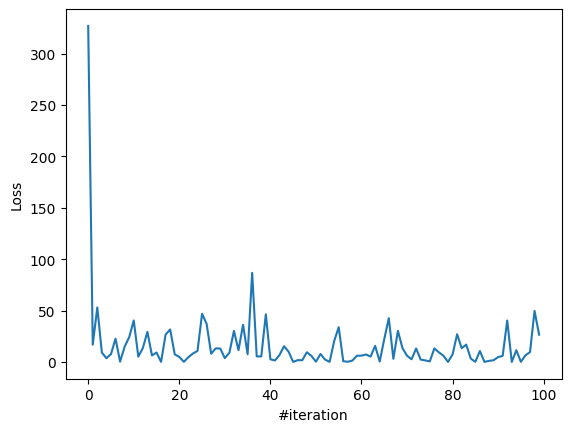

In [14]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [15]:
#Multiple choices:
#Question 8:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


#### Inference

In [16]:
#Multiple choices:
#Question 9:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [17]:
# [230.1, 37.8, 69.2, 22.1]

tv = 230.1
radio = 37.8
newspaper = 69.2

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 24.412408996908397


###Question 3

In [48]:
import numpy as np


def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []  # Lưu lại các giá trị mất mát trong mỗi epoch

    # Khởi tạo tham số
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    # Bắt đầu vòng lặp qua các epoch
    for epoch in range(epoch_max):

        loss_total = 0.0  # Tổng mất mát trong mỗi epoch
        dw1_total = 0.0  # Tổng gradient w1
        dw2_total = 0.0  # Tổng gradient w2
        dw3_total = 0.0  # Tổng gradient w3
        db_total  = 0.0  # Tổng gradient b

        # Duyệt qua từng sample trong N sample
        for i in range(N):
            # Lấy dữ liệu input (x1, x2, x3) và output (y)
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Dự đoán y_hat
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Tính toán mất mát (ở đây chọn MSE)
            loss = compute_loss_mse(y, y_hat)

            # Tích lũy tổng mất mát
            loss_total += loss

            # Tính toán gradient cho w1, w2, w3, và b
            dw1 = compute_gradient_wi(x1, y, y_hat)
            dw2 = compute_gradient_wi(x2, y, y_hat)
            dw3 = compute_gradient_wi(x3, y, y_hat)
            db = compute_gradient_b(y, y_hat)

            # Tích lũy gradient
            dw1_total += dw1
            dw2_total += dw2
            dw3_total += dw3
            db_total += db

        # Sau khi duyệt qua toàn bộ N mẫu, cập nhật trọng số
        w1 -= lr * dw1_total / N  # Cập nhật w1
        w2 -= lr * dw2_total / N  # Cập nhật w2
        w3 -= lr * dw3_total / N  # Cập nhật w3
        b -= lr * db_total / N    # Cập nhật b

        # Lưu lại giá trị mất mát trung bình trong epoch này
        losses.append(loss_total / N)

        # Log thông tin epoch (tuỳ chọn)
        # print(f'Epoch {epoch + 1}/{epoch_max}, Loss: {loss_total/N}')

    return w1, w2, w3, b, losses


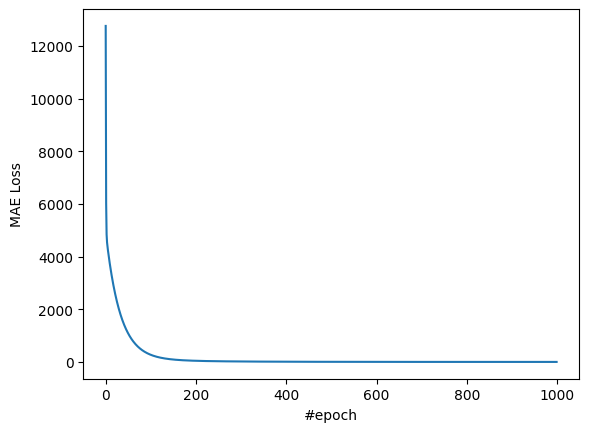

In [49]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b,losses) = implement_linear_regression_nsamples(X,y,epoch_max = 1000, lr = 1e-5)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

In [50]:
#Multiple choices:
#Question 11:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
print(w1,w2,w3)

0.06264970431269246 0.1380784708176973 0.020015951716765595
